In [23]:
import schemdraw
from schemdraw import flow
import schemdraw.elements as elm
from railroad import (
    Diagram, Choice, Optional, ZeroOrMore, OneOrMore, Terminal, NonTerminal, Start, End
)
import railroad
from pyparsing.diagram import to_railroad, railroad_to_html
from xml.etree.ElementTree import Element, SubElement, tostring
import graphviz
from IPython.display import SVG, display
import sys
import random
from io import StringIO, BytesIO
import subprocess

# Basic usage

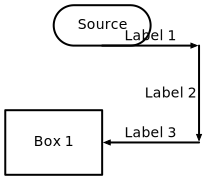

In [24]:
with schemdraw.Drawing() as d:
    d.add(flow.Start(label='Source'))
    d.add(flow.Arrow().right().label('Label 1'))
    d.add(flow.Arrow().down().label('Label 2'))
    d.add(flow.Arrow().left().label('Label 3'))
    d.add(flow.Box(label='Box 1'))

In [61]:
def analyse_grammar():
    # read grammar.grm
    # analyse grammar
    # return grammar
    defines = []
    content = []
    map_content_define = {}
    index = 0
    with open('../SolO/txl/new_version/grammar/importan.grm', 'r') as f:
        in_define_block = False
        current_define = None

        for line in f:
            line = line.strip()

            if line.startswith('define'):
                in_define_block = True
                current_define = line.split(' ')[1]
                defines.append(current_define)
                content.append([])
            elif line == 'end define':
                in_define_block = False
            elif in_define_block and not line.startswith('%') and line != '':
                content[-1].append(line)

        for i, define in enumerate(defines):
            map_content_define[define] = content[i]

    return map_content_define

def draw_grammar(_map):

    grammar = {
        'expression': ['term', 'expression'],
        'term': ['factor', 'term'],
        'factor': ['constant', 'variable', '(', 'expression', ')'],
        'variable': ['x', 'y', 'z'],
        'constant': ['digit'],
        'digit': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    }

    G = graphviz.Digraph('G', format='svg')
    G.attr(rankdir='LR')
    with G.subgraph(name="cat") as cn:
        cn.attr(rankdir="TB", style='filled', color='red')
        cn.node('Parsing', shape='doublecircle')
        with G.subgraph(name='cluster_0') as c:
            c.attr(rankdir="LR", style='filled', color='lightgrey')
            c.node_attr.update(style='filled', color='white')
            c.node('Start')
            for key, value in _map.items():
                c.node(key, shape='circle')
                for v in value:
                    c.node(v, shape='circle', color='yellow')
                    c.edge(key, v)
            c.attr(label='Grammar')
            cn.edge('Parsing', 'Start')

        with G.subgraph(name='cluster_1') as c:
            c.attr(rankdir="LR", style='filled', color='lightgrey')
            c.node_attr.update(style='filled', color='white')
            c.node('Start', shape='circle')
            c.edge('Start', 'Transformation')
            c.attr(label='Transformation Phase')
        cn.node('Transformation', shape='doublecircle')
        cn.edge('Transformation', 'Sta  rt')
        cn.edge('Parsing', 'Transformation')
        cn.attr(label='Categories')
    G.render('output.svg', view=True)

In [62]:
draw_grammar(analyse_grammar())